# Milk Quelity Prediction

https://www.kaggle.com/datasets/cpluzshrijayan/milkquality

In [25]:
import pandas as pd
import sqldf

In [26]:
base_milk = pd.read_csv('milknew.csv')

In [27]:
base_milk_2 = sqldf.run(''' 
select *,
(case
    when grade = 'high' then 1 
    else 0                     
end) TIP_CTE_BIN from base_milk 
''')

In [28]:
base_milk_2.columns

Index(['index', 'pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity',
       'Colour', 'Grade', 'TIP_CTE_BIN'],
      dtype='object')

In [29]:
base_milk_2.rename(columns = {'Fat ':'fat'}, inplace = True)

In [30]:
import sys

# Add the path to the directory containing your module
sys.path.append("C:\\Users\\my pc\\Documents\\Python\\Clases")

In [31]:
from mccred import model_selection 
ms = model_selection()

In [32]:
base_desarrollo, base_validacion = ms.base_split(base_milk_2)

In [33]:
from mccred_credito import tree_categories
tc = tree_categories()

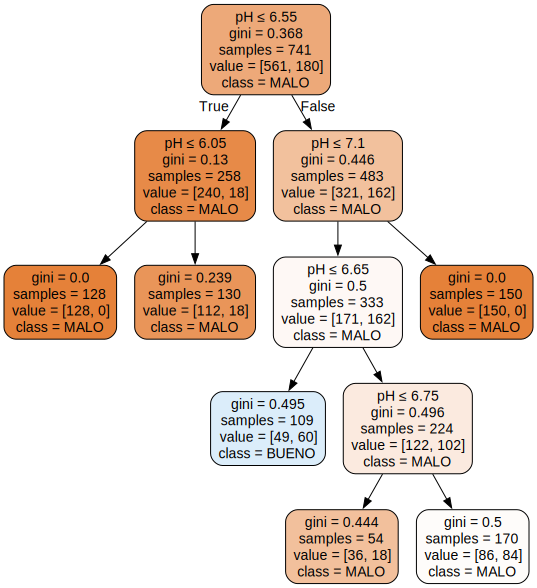

In [34]:
nodos, categ = tc.arbol_categoria(base_desarrollo[['pH']], base_desarrollo[['TIP_CTE_BIN']], 2, int(len(base_desarrollo)*0.02))

In [35]:
base_categ = sqldf.run(''' 
select *,  strftime("%Y-%m-%d", "now") as FECHACORTE, 1 INTERCEPTO, 
(case
    when pH <= 6.55 then 1
    when pH <= 7.1 then 2
    else 3                   
end) pH_categ, 
(case
    when temprature <= 39 then 1
    else 2                   
end) temperature_categ, 
(case
    when taste <= 0.5 then 1
    else 2                 
end) taste_categ, 
(case
    when odor <= 0.5 then 1
    else 2             
end) odor_categ, 
(case
    when fat <= 0.5 then 1
    else 2                     
end) fat_categ, 
(case
    when turbidity <= 0.5 then 1
    else 2                 
end) turbidity_categ, 
(case
    when colour in (240, 246, 247, 248) then 1
    when colour in (245, 250, 255) then 2
    else 3                
end) color_categ from base_milk_2
''')

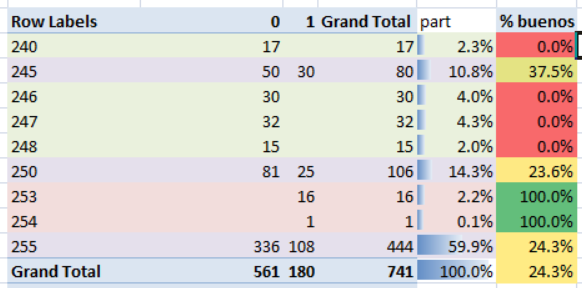

In [36]:
base_categ.columns

Index(['level_0', 'index', 'pH', 'Temprature', 'Taste', 'Odor', 'fat',
       'Turbidity', 'Colour', 'Grade', 'TIP_CTE_BIN', 'FECHACORTE',
       'INTERCEPTO', 'pH_categ', 'temperature_categ', 'taste_categ',
       'odor_categ', 'fat_categ', 'turbidity_categ', 'color_categ'],
      dtype='object')

In [37]:
base_desarrollo_2 = base_categ[['index', 'FECHACORTE', 'TIP_CTE_BIN', 'INTERCEPTO', 'pH_categ',
       'temperature_categ', 'taste_categ', 'odor_categ', 'fat_categ',
       'turbidity_categ', 'color_categ']]

C:\Users\my pc\Documents\Python\Clases\mccred.py:387: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  base.rename(columns = {'index':'IDCTE', 'DATE':'FECHACORTE'}, inplace=True)
c:\Python310\lib\site-packages\scorecardpy\condition_fun.py:34: UserWarning: There are 2 columns have only one unique values, which are removed from input dataset. 
 (ColumnNames: FECHACORTE, INTERCEPTO)
  warnings.warn("There are {} columns have only one unique values, which are removed from input dataset. \n (ColumnNames: {})".format(len(unique1_cols), ', '.join(unique1_cols)))


[INFO] creating woe binning ...
[INFO] converting into woe values ...
[INFO] converting into woe values ...


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1

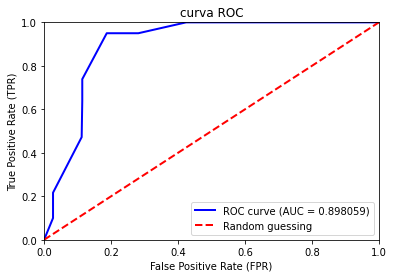

No tiene betas negativas
No tiene altas correlaciones
La ROC de Benchmark es: 0.9540354525648643
La ROC en Validacion de Benchmark es: 0.9550619834710744
La ROC implementable es :0.8980590215884334
La ROC en Validacion implementable es: 0.8574923879947803


c:\Python310\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


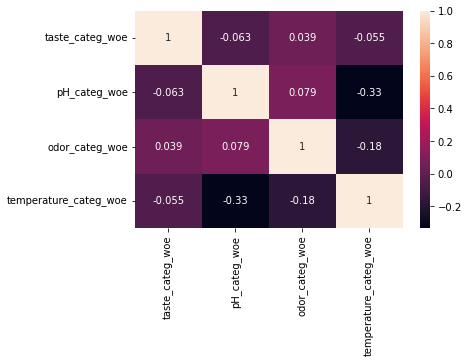

In [38]:
score_card, base_validacion = ms.modelador(base_desarrollo_2, 4)

In [39]:
score_card.drop(['index'], axis =1, inplace = True)

In [40]:
base_categ.rename(columns = {'index':'IDCTE'}, inplace = True)

In [41]:
base_categ.drop(['level_0'], axis =1 , inplace = True)

In [42]:
from mccred_credito import model_selection
ms1 = model_selection()

In [43]:
base_score = ms1.score(score_card, base_categ)

In [44]:
base_score

,IDCTE,FECHACORTE,TIP_CTE_BIN,SCORE
0,0,2024-05-17,1,43.0
1,1,2024-05-17,1,77.0
2,2,2024-05-17,0,56.0
3,3,2024-05-17,0,89.0
4,4,2024-05-17,0,23.0
...,...,...,...,...
1054,1054,2024-05-17,0,56.0
1055,1055,2024-05-17,1,43.0
1056,1056,2024-05-17,0,8.0
1057,1057,2024-05-17,1,10.0


In [45]:
calif = ms1.calificacion(base_score, -5, 18, 55)
tabla_rendimiento = ms1.tabla_rendimiento_buenos_2(calif)

In [46]:
tabla_rendimiento

,index,CALIFICACION,MALO,BUENO,TOTAL,TOTAL_BIN,TASA_BUENOS,PART
0,0,A,98,113,211,211,0.535545,0.199245
1,1,B,131,128,259,259,0.494208,0.244570
2,2,C,574,15,589,589,0.025467,0.556185
